# Spam Classification

In [51]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import string
import re

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

**Reading Data**

In [2]:
data=pd.read_csv('Text_HAM_SPAM_calssification.csv')

#data=pd.read_csv('spam.csv')

In [3]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,Your gonna have to pick up a $1 burger for you...


** Analyzing data**

In [4]:
data.shape

(5026, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5026 entries, 0 to 5025
Data columns (total 2 columns):
Category    1726 non-null object
Message     1791 non-null object
dtypes: object(2)
memory usage: 78.7+ KB


In [6]:
data.isnull().sum()

Category    3300
Message     3235
dtype: int64

In [7]:
data[data['Category'].isnull()]

,Category,Message
1000,NaN,I'm at work. Please call
1001,NaN,Then u drive lor.
1002,NaN,Ard 515 like dat. Y?
1003,NaN,Tell me they're female :V how're you throwing ...
1004,NaN,EASTENDERS TV Quiz. What FLOWER does DOT compa...
...,...,...
5021,NaN,NaN
5022,NaN,NaN
5023,NaN,NaN
5024,NaN,NaN


In [8]:
len(data[data['Message'].isnull()])

3235

In [9]:
#(data[data.columns[data.isna().any()]])

In [10]:
#data.drop(data[data["Category"]=="NaN"].index,axis = 0,inplace = True)

In [11]:
# dropping rows with null values

data_clean=data.dropna()

In [12]:
data_clean.shape

(1726, 2)

In [13]:
data_clean.isnull().sum()

Category    0
Message     0
dtype: int64

In [14]:


#data_clean['Length']=data_clean['Message'].apply(len)

data_clean.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,Your gonna have to pick up a $1 burger for you...


In [15]:
data_clean.Category.value_counts()

ham     1490
spam     236
Name: Category, dtype: int64

Percentage for default

ham     86.33
spam    13.67
Name: Category, dtype: float64


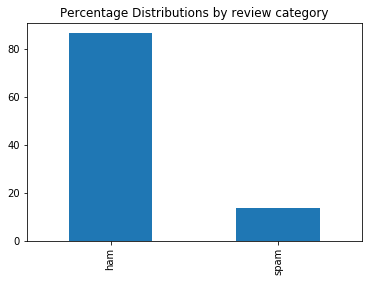

In [16]:

print('Percentage for default\n')
print(round(data_clean.Category.value_counts(normalize=True)*100,2))
round(data_clean.Category.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review category')
plt.show()

In [17]:
data_clean.describe().transpose()

,count,unique,top,freq
Category,1726,2,ham,1490
Message,1726,1667,"Sorry, I'll call later",10


In [18]:
data_clean.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,Your gonna have to pick up a $1 burger for you...


In [19]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1726 entries, 0 to 1790
Data columns (total 2 columns):
Category    1726 non-null object
Message     1726 non-null object
dtypes: object(2)
memory usage: 40.5+ KB


In [20]:
print (string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


**Removing Stop words and punctuations**

In [21]:
def clean_Data(text):
    text = re.sub(r"didn't", "did not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"wasn't", "do not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"n\'t", " not", text)
    
    text=str(text).lower()
    
    p=set(string.punctuation)
    for i in range(10):
        p.add(str(i))
        
    words=text.split()
    text=[]
    for word in words:
        text_word=''.join(i for i in word if i not in p)
        text.append(text_word)
    return ' '.join(text)

In [52]:
from nltk.corpus import stopwords

stop=set(stopwords.words('english'))
#stop.remove('no')
#stop.remove('not')
#print (stop)


clean_doc=[]
for doc in data_clean['Message'].values:
    clean_text=clean_Data(doc)
    if len(clean_text)!=0:
        clean_doc.append(clean_text)
    else:
        clean_doc.append('NAN')
    
data_clean['Cleaned_data']=clean_doc

In [23]:
data_clean.shape

(1726, 3)

In [24]:
data_clean[data_clean['Cleaned_data']=='NAN'].count()

Category        1
Message         1
Cleaned_data    1
dtype: int64

In [25]:
data_clean[data_clean['Cleaned_data']=='NAN']

,Category,Message,Cleaned_data
1556,ham,645,NAN


In [26]:
data_clean.drop(data_clean[data_clean["Cleaned_data"]=='NAN'].index,axis = 0,inplace = True) # deleting rows that have no text 
data_clean=data_clean.reset_index(drop='true') # after deleting rows index should be reset
data_clean['Category']= data_clean['Category'].replace('ham',0)
data_clean['Category']= data_clean['Category'].replace('spam',1)

C:\Users\RajMahendra\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
data_clean[data_clean['Category']==1]

,Category,Message,Cleaned_data
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...
9,1,"As a valued customer, I am pleased to advise y...",as a valued customer i am pleased to advise yo...
11,1,Urgent UR awarded a complimentary trip to Euro...,urgent ur awarded a complimentary trip to euro...
12,1,"Did you hear about the new ""Divorce Barbie""? I...",did you hear about the new divorce barbie it c...
37,1,Please call our customer service representativ...,please call our customer service representativ...
...,...,...,...
1659,1,BIG BROTHER ALERT! The computer has selected u...,big brother alert the computer has selected u ...
1671,1,WIN: We have a winner! Mr. T. Foley won an iPo...,win we have a winner mr t foley won an ipod mo...
1685,1,Todays Voda numbers ending 1225 are selected t...,todays voda numbers ending are selected to re...
1708,1,Hottest pics straight to your phone!! See me g...,hottest pics straight to your phone see me get...


In [28]:
data_clean[data_clean['Cleaned_data']=='NAN'].count()

Category        0
Message         0
Cleaned_data    0
dtype: int64

In [29]:
data_clean.shape

(1725, 3)

**Stemming**

In [30]:
from nltk.stem.snowball import SnowballStemmer

s=SnowballStemmer("english")

clean_doc1=[]
for sent in data_clean['Cleaned_data'].values:
    d=' '.join(s.stem(word) for word in sent.split())
    clean_doc1.append(d)

data_clean['Cleaned_data1']=clean_doc1   

In [31]:
data_clean.head()

,Category,Message,Cleaned_data,Cleaned_data1
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...,free entri in a wkli comp to win fa cup final ...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so earli hor u c alreadi then say
4,0,Your gonna have to pick up a $1 burger for you...,your gonna have to pick up a burger for yours...,your gonna have to pick up a burger for yourse...


In [32]:
data_clean.Category.unique()

array([0, 1], dtype=int64)

In [33]:
data_clean.rename({'Cleaned_data1':'Cleaned_data_new'},axis=1, inplace=True)

In [34]:
data_clean.head()

,Category,Message,Cleaned_data,Cleaned_data_new
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...,free entri in a wkli comp to win fa cup final ...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so earli hor u c alreadi then say
4,0,Your gonna have to pick up a $1 burger for you...,your gonna have to pick up a burger for yours...,your gonna have to pick up a burger for yourse...


In [35]:
Length=data_clean['Message'].apply(len)


In [36]:
data_clean.head()

,Category,Message,Cleaned_data,Cleaned_data_new
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...,free entri in a wkli comp to win fa cup final ...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so earli hor u c alreadi then say
4,0,Your gonna have to pick up a $1 burger for you...,your gonna have to pick up a burger for yours...,your gonna have to pick up a burger for yourse...


In [37]:
df=data_clean['Cleaned_data_new']
y=data_clean['Category']



In [38]:
df.head()

0    go until jurong point crazi avail onli in bugi...
1                                ok lar joke wif u oni
2    free entri in a wkli comp to win fa cup final ...
3          u dun say so earli hor u c alreadi then say
4    your gonna have to pick up a burger for yourse...
Name: Cleaned_data_new, dtype: object

** Bag of Words**

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer

tvec = CountVectorizer()

#converting sentences to Tf-Idf vectors
X=tvec.fit_transform(df)

print (X.shape)

(1725, 3779)


In [40]:
X=tvec.fit(df)
X.vocabulary_
X.get_feature_names()

['aah',
 'aaniy',
 'aaooooright',
 'aathilov',
 'aathiwher',
 'aberdeen',
 'abil',
 'abiola',
 'abl',
 'abnorm',
 'about',
 'abt',
 'aburo',
 'ac',
 'acc',
 'accentur',
 'accept',
 'access',
 'accid',
 'accident',
 'accommod',
 'accomod',
 'accordinglyor',
 'account',
 'ach',
 'acid',
 'acknowledg',
 'acoentri',
 'across',
 'acsmsreward',
 'act',
 'action',
 'activ',
 'actor',
 'actual',
 'acwicmbcktzr',
 'ad',
 'adam',
 'add',
 'addamsfa',
 'addi',
 'addict',
 'address',
 'addressu',
 'administr',
 'admir',
 'admiti',
 'ador',
 'adult',
 'advanc',
 'adventur',
 'advis',
 'ae',
 'aeronaut',
 'aeroplan',
 'affect',
 'afghanistan',
 'afraid',
 'aft',
 'after',
 'afternoon',
 'aftr',
 'ag',
 'again',
 'againcal',
 'against',
 'age',
 'agent',
 'agesr',
 'ago',
 'agre',
 'ah',
 'aha',
 'ahead',
 'ahge',
 'ahnow',
 'ahold',
 'ahsen',
 'ahth',
 'ahwhat',
 'aid',
 'aig',
 'aight',
 'ain',
 'aint',
 'air',
 'airport',
 'aiya',
 'aiyah',
 'aiyar',
 'aiyo',
 'aj',
 'ak',
 'al',
 'alaipayuth',
 '

In [41]:
X=tvec.fit_transform(df).toarray()


In [42]:
df_new=pd.DataFrame(X, columns=tvec.get_feature_names())

#df_new=pd.concat([df_new,Length], axis=1 )

In [43]:
df_new.head()

,aah,aaniy,aaooooright,aathilov,aathiwher,aberdeen,abil,abiola,abl,abnorm,...,yrs,yummi,yun,yuo,yup,ywhere,zaher,zed,zoe,zouk
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Data Modelling**

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size = 0.2, random_state = 225)

from sklearn.naive_bayes import MultinomialNB

model=MultinomialNB().fit(X_train,y_train)

y_pred=model.predict(X_train)

In [45]:
confusion_matrix(y_train, y_pred)

array([[1190,    1],
       [   8,  181]], dtype=int64)

In [46]:
print (classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00      1191
          1       0.99      0.96      0.98       189

avg / total       0.99      0.99      0.99      1380



In [47]:
# predictions on test data

y_test_pred=model.predict(X_test)

confusion_matrix(y_test, y_test_pred)

array([[293,   5],
       [  5,  42]], dtype=int64)

In [48]:
print (classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98       298
          1       0.89      0.89      0.89        47

avg / total       0.97      0.97      0.97       345



In [49]:
 ## Testing on new reviews 

example = ["upto 20% discount on car parking , exclusive offer only for you"]
example_test=tvec.transform(example)
#result = model.predict(example)

result = model.predict(example_test.toarray())

print(result)

[1]


In [50]:

example = ["I will call you later"]

example_test=tvec.transform(example)
#result = model.predict(example)

result = model.predict(example_test.toarray())

print(result)

[0]
